In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import sklearn
import sklearn.preprocessing

from scipy import sparse

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

import nltk
nltk.download('stopwords')
import nltk.corpus
import nltk.stem.porter
import nltk.stem.lancaster
import nltk.stem.wordnet

In [2]:
import keras.losses

# 1. Load data

In [43]:
csv_df = pd.read_csv('./data/train.csv', keep_default_na=False)

In [44]:
csv_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


# 2. Train/test split

In [4]:
csv_df_train, csv_df_test = train_test_split(csv_df,test_size = 0.2)

In [5]:
csv_df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
1472799,8697c9a7a43d,bff7b9725d88,Тульская область,Тула,Транспорт,Водный транспорт,Моторные лодки,,,Романтика - 2,"Продается лодка Романтика - 2 , усиленный тран...",40000.0,17,2017-03-21,Company,e61f3e4f0b9ae04c6f77bf8f1284c0185a94bbd62f9d0a...,2264.0,0.04060
374463,34fed71b3c64,6c3a116bc963,Воронежская область,Воронеж,Для бизнеса,Оборудование для бизнеса,Промышленное,,,Зубофрезер.53А50Н,Зубофрезер.53А50Н 3шт рабочие подключим,310000.0,367,2017-03-15,Company,015cdeb0de829b14f212d5551833bc589424a13ccfe8b2...,1083.0,0.00000
715607,3ccd1c9286fa,7294a6ed6bff,Пермский край,Пермь,Недвижимость,Коммерческая недвижимость,Сниму,Помещение свободного назначения,,Сниму помещение свободного назначения,Сниму помещение под косметологический кабинет....,,4,2017-03-27,Private,,,0.16395
890832,628c63243e31,14d548da445e,Татарстан,Казань,Личные вещи,Товары для детей и игрушки,Детские коляски,,,Коляска 2 в 1 Adamex Classic,Продам коляску. 6999/\nбыла куплена за 20000/\...,6999.0,7,2017-03-24,Private,763e996d877f3f7455b83f86bb1874400bd6ae7ac99943...,1002.0,0.00000
1273527,6eaf8d2dfede,7c31935fca44,Пермский край,Пермь,Бытовая электроника,Настольные компьютеры,,,,Athlon 2 3-ядерный 4 Гб DDR3 500 Гб,Athlon 2-415 2500 МГц/\n4 Гигабайта DDR3/\nЖес...,6200.0,2848,2017-03-23,Company,ccc52634b3d31f909717696793b68d52c67dcda34fb24e...,2789.0,0.00000


# 3. Preprocess data

In [6]:
csv_df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
1472799,8697c9a7a43d,bff7b9725d88,Тульская область,Тула,Транспорт,Водный транспорт,Моторные лодки,,,Романтика - 2,"Продается лодка Романтика - 2 , усиленный тран...",40000.0,17,2017-03-21,Company,e61f3e4f0b9ae04c6f77bf8f1284c0185a94bbd62f9d0a...,2264.0,0.04060
374463,34fed71b3c64,6c3a116bc963,Воронежская область,Воронеж,Для бизнеса,Оборудование для бизнеса,Промышленное,,,Зубофрезер.53А50Н,Зубофрезер.53А50Н 3шт рабочие подключим,310000.0,367,2017-03-15,Company,015cdeb0de829b14f212d5551833bc589424a13ccfe8b2...,1083.0,0.00000
715607,3ccd1c9286fa,7294a6ed6bff,Пермский край,Пермь,Недвижимость,Коммерческая недвижимость,Сниму,Помещение свободного назначения,,Сниму помещение свободного назначения,Сниму помещение под косметологический кабинет....,,4,2017-03-27,Private,,,0.16395
890832,628c63243e31,14d548da445e,Татарстан,Казань,Личные вещи,Товары для детей и игрушки,Детские коляски,,,Коляска 2 в 1 Adamex Classic,Продам коляску. 6999/\nбыла куплена за 20000/\...,6999.0,7,2017-03-24,Private,763e996d877f3f7455b83f86bb1874400bd6ae7ac99943...,1002.0,0.00000
1273527,6eaf8d2dfede,7c31935fca44,Пермский край,Пермь,Бытовая электроника,Настольные компьютеры,,,,Athlon 2 3-ядерный 4 Гб DDR3 500 Гб,Athlon 2-415 2500 МГц/\n4 Гигабайта DDR3/\nЖес...,6200.0,2848,2017-03-23,Company,ccc52634b3d31f909717696793b68d52c67dcda34fb24e...,2789.0,0.00000


In [7]:
df_train = csv_df_train[['item_id', 'title', 'description', 'deal_probability']]
df_test = csv_df_test[['item_id', 'title', 'description', 'deal_probability']]

In [8]:
df_train.head()

,item_id,title,description,deal_probability
1472799,8697c9a7a43d,Романтика - 2,"Продается лодка Романтика - 2 , усиленный тран...",0.04060
374463,34fed71b3c64,Зубофрезер.53А50Н,Зубофрезер.53А50Н 3шт рабочие подключим,0.00000
715607,3ccd1c9286fa,Сниму помещение свободного назначения,Сниму помещение под косметологический кабинет....,0.16395
890832,628c63243e31,Коляска 2 в 1 Adamex Classic,Продам коляску. 6999/\nбыла куплена за 20000/\...,0.00000
1273527,6eaf8d2dfede,Athlon 2 3-ядерный 4 Гб DDR3 500 Гб,Athlon 2-415 2500 МГц/\n4 Гигабайта DDR3/\nЖес...,0.00000


# 4. Preprocess text

In [3]:
def lower_case(string):
    return string.lower()

def replace_non_alphanumeric_with_space(string):
    # replace punctuation and different whitespace with space character
    return re.sub(r'[^a-z0-9а-я ]', ' ', string)

def strip_punctuation(string):
    # remove punctuation
    return re.sub(r'[^a-z0-9а-я\s]', ' ', string)

def remove_stop_words(string, stop_words):
    return ' '.join([ word for word in re.split(' ', string) if not word in stop_words ])

def replace_numeric_with_literal(string):
    return re.sub(r'([0-9]+ ?)+', '<num> ', string)

def compact_whitespace(string):
    return re.sub(r'\s+', ' ', string)

def stem(string, stemmer):
    return ' '.join([ 
        stemmer.stem(word) if hasattr(stemmer, 'stem') else stemmer.lemmatize(word)
        for word in re.split(' ', string) if not word in stop_words 
    ])

In [4]:
from nltk.stem.snowball import SnowballStemmer 

stemmer = SnowballStemmer("russian") 

In [5]:
stop_words = nltk.corpus.stopwords.words('russian')

In [6]:
def pre_process(string):
    s = lower_case(string)
    s = strip_punctuation(s)
    s = remove_stop_words(s, stop_words)
    s = compact_whitespace(s)
    s = replace_numeric_with_literal(s)
    s = stem(s, stemmer)
    return s.strip()

In [7]:
example = 'Добрый день. Продаю отличный автомобиль в'
pre_process(example)

'добр ден прода отличн автомобил'

In [8]:
def pre_process_text_fields(df):
    df['text'] = df['title'].map(lambda x: pre_process(x)) + ' ' + df['description'].map(lambda x: pre_process(x))
    return df.drop(labels=['title','description'], axis=1)

Preprocessing takes a lot of time because of large number of entries. Instead of doing preprocessing download saved results. You can download saved results from https://drive.google.com/open?id=1GeN5xK2M8ASCP1HVv_WiJfeJD9EdCbbb

In [2]:
# df_train = pre_process_text_fields(df_train)
# df_test = pre_process_text_fields(df_test)
# df_train.to_csv("train_preprocessed.csv")
# df_test.to_csv("test_preprocessed.csv")

_df_train = pd.read_csv("train_preprocessed.csv")
_df_test = pd.read_csv("test_preprocessed.csv")
df_train  = _df_train.drop(_df_train.columns[0], axis=1)
df_test  = _df_test.drop(_df_test.columns[0], axis=1)

### replace rare words

In [10]:
def get_counts_by_word(docs):
    word_counts = {}
    for doc in docs:
        for word in doc.split():
            if len(word) > 0:
                if word not in word_counts:
                    word_counts[word] = 0
                word_counts[word] += 1
    return word_counts

counts_by_word_pre_processed_train = get_counts_by_word(df_train[['text']].values.ravel().tolist())

len(counts_by_word_pre_processed_train)

236729

In [11]:
counts_by_word_pre_processed_train

{'чемитоквадж': 1,
 'сечас': 5,
 'водоскат': 1,
 'актянов': 1,
 'dgt': 2,
 'вазм': 2,
 'банбархат': 1,
 'наращ': 14,
 'нктдоск': 1,
 'xcom': 93,
 'пембертон': 1,
 'дамкрат': 1,
 'вытерает': 1,
 'четырехсот': 1,
 'ultrapad': 2,
 'рефлексотерапевт': 1,
 'дизаин': 5,
 'multimedia<num>': 1,
 'монограммн': 1,
 'бсд': 1,
 'graft': 1,
 'бандж': 10,
 'стартуп': 1,
 'харнес': 1,
 'двухсимкарточн': 1,
 'инкуб': 22,
 'выгорож': 2,
 'гидрокоробк': 1,
 'футболл': 1,
 'сиблидер': 6,
 'гсш': 3,
 'хейр': 2,
 'касабланк': 3,
 'fold': 25,
 'блакт': 1,
 'выклучател': 1,
 'газоразрядн': 17,
 'jekk': 1,
 'биоэлектромагнитн': 1,
 'izol': 1,
 'ppf': 2,
 'speron': 3,
 'вяземск': 3,
 'снилл': 1,
 'нимб': 8,
 'многократн': 190,
 'artic<num>': 1,
 'автозаправок': 2,
 'копатыч': 1,
 'сенатск': 2,
 'isolution': 1,
 'химк': 5,
 'cпиннингист': 2,
 'фловербокс': 3,
 'sweetpeac': 76,
 'штабелируем': 9,
 'конаковск': 2,
 'автоинлайн': 1,
 'опочн': 2,
 'rocel': 1,
 'подготовительн': 119,
 'однокомнотн': 22,
 'пеносепара

In [12]:
counts_by_word_pre_processed_train_as_dataframe = pd.DataFrame(pd.Series(counts_by_word_pre_processed_train, name='count')).sort_values('count', ascending=False)

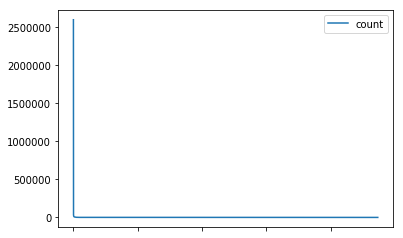

In [13]:
counts_by_word_pre_processed_train_as_dataframe.plot()

In [14]:
num_words = 5000
counts_by_word_pre_processed_train_as_dataframe[:num_words].head(10)

,count
<num>,2595429
состоян,358381
нов,282804
прод,269567
размер,212736
м,198942
хорош,180730
отличн,179856
квартир,177588
р,154045


In [15]:
counts_by_word_pre_processed_train_as_dataframe[:num_words].tail()

,count
заведен,557
доста,557
борд,557
wav,557
селф,557


In [16]:
top_words = list(counts_by_word_pre_processed_train.items())
top_words.sort(key = lambda it: it[1])
top_words.reverse()
top_words = [ word for word, count in top_words[:num_words] ]
print(len(top_words))
top_words[:10]

5000


['<num>',
 'состоян',
 'нов',
 'прод',
 'размер',
 'м',
 'хорош',
 'отличн',
 'квартир',
 'р']

In [18]:
pd.DataFrame(top_words).to_csv('top_words.csv', header=False)

In [19]:
def replace_rare_words_with_literal(string, top_words):
    return ' '.join([ (word if word in top_words else '<unk>') for word in re.split(' ', string) ])

Preprocessing takes a lot of time because of large number of entries. Instead of doing preprocessing download saved results. You can download saved results from https://drive.google.com/open?id=1GeN5xK2M8ASCP1HVv_WiJfeJD9EdCbbb

In [44]:
# df_train['text'] = df_train['text'].map(lambda x: replace_rare_words_with_literal(x, top_words))
# df_test['text'] = df_test['text'].map(lambda x: replace_rare_words_with_literal(x, top_words))
# df_train.to_csv("train_preprocessed_drop_rare_words.csv")
# df_test.to_csv("test_preprocessed_drop_rare_words.csv")

_df_train = pd.read_csv("train_preprocessed_drop_rare_words.csv")
_df_test = pd.read_csv("test_preprocessed_drop_rare_words.csv")
df_train  = _df_train.drop(_df_train.columns[0], axis=1)
df_test  = _df_test.drop(_df_test.columns[0], axis=1)

# 5. Tokenize text

In [23]:
df_train.head()

,item_id,deal_probability,text
0,8697c9a7a43d,0.04060,<unk> <num> прода лодк <unk> <num> усилен <unk...
1,34fed71b3c64,0.00000,<unk> <num> а<нум> н <unk> <num> а<нум> н <num...
2,3ccd1c9286fa,0.16395,сним помещен свободн назначен сним помещен <un...
3,628c63243e31,0.00000,коляск <num> adamex classic прод коляск <num> ...
4,6eaf8d2dfede,0.00000,athlon <num> ядерн <num> гб ddr<num> гб athlon...


In [24]:
num_words = 5000
vocab_size = num_words
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train.text)

# 7. Train a model

In [25]:
# prepare generator
def text_generator(df, batch_size, tokenizer):
    n = df.shape[0]
    for i in range(n // batch_size):
        yield tokenizer.texts_to_matrix(df[i:i+batch_size].text, mode='tfidf'), df.iloc[i:i+batch_size,1:2].values
        
train_generator = text_generator(df_train, 1000, tokenizer)

### Try simple fully-connected

In [26]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2560512   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
__________

In [27]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='adam')

In [28]:
history = model.fit_generator(train_generator, steps_per_epoch=df_train.shape[0]//1000, epochs=1, verbose=1)

Epoch 1/1
1202/1202 [==============================] - 105s 87ms/step - loss: 0.00361s - los


In [29]:
test_generator = text_generator(df_test, 1000, tokenizer)
score = model.evaluate_generator(test_generator, steps=df_test.shape[0]//1000, verbose=1)
 
print('Test loss:', score)

300/300 [==============================] - 25s 84ms/step
Test loss: 0.08323196955025196


In [30]:
x_test = tokenizer.texts_to_matrix(df_test.text, mode='tfidf')
score = model.evaluate(x_test, df_test.iloc[:,1:2].values, batch_size=1000, verbose=1); score

300685/300685 [==============================] - 9s 30us/step


0.074864363157232

In [31]:
model.save('fully_conv.h5')

# Prepare submission

In [32]:
csv_df_subm = pd.read_csv('./data/test.csv', keep_default_na=False); csv_df_subm.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,,,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,,
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,,,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,,
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,,,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


In [33]:
df_subm = csv_df_subm[['item_id', 'title', 'description']]; df_subm.head()

,item_id,title,description
0,6544e41a8817,Отдам бесплатно,На ангарском
1,65b9484d670f,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо..."
2,8bab230b2ecd,BBK,Продам новый телевизор BBK 32 диагональ смарт...
3,8e348601fefc,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами...."
4,8bd2fe400b89,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...


In [3]:
df_subm = pre_process_text_fields(df_subm)

In [35]:
df_subm['text'] = df_subm['text'].map(lambda x: replace_rare_words_with_literal(x, top_words))

In [36]:
df_subm.head()

,item_id,text
0,6544e41a8817,отд бесплатн <unk>
1,65b9484d670f,прод велосипед прод велосипед <unk> f<num> нор...
2,8bab230b2ecd,<unk> прод нов телевизор <unk> <num> диагонал ...
3,8e348601fefc,вытяжк <unk> <num> прод нов вытяжк упаковк док...
4,8bd2fe400b89,коляск зим лет прод отличн коляск б <num> год ...


In [37]:
df_subm.shape

(508438, 2)

In [38]:
x_test.shape

(300685, 5000)

In [63]:
[i for i in range(0, 5, 2)]

[0, 2, 4]

In [74]:
submission = pd.DataFrame(columns=['item_id','deal_probability'])

In [75]:
def todict(val): return {'item_id': val[0],'deal_probability': val[1]}

In [76]:
n_subm = df_subm.shape[0]; step = 10000
for i in range(0, n_subm, step):
    if i%100000 == 0: print(i)
    _tmp=df_subm[i:min(i+step,n_subm)]
    x_subm = tokenizer.texts_to_matrix(_tmp.text, mode='tfidf')
    predictions = model.predict(x_subm)
    submission = submission.append(list(map(todict, list(zip(_tmp.item_id, predictions.ravel().tolist())))))

0
100000
200000
300000
400000
500000


In [77]:
submission.head()

,item_id,deal_probability
0,6544e41a8817,0.066563
1,65b9484d670f,0.105742
2,8bab230b2ecd,0.394878
3,8e348601fefc,0.018386
4,8bd2fe400b89,0.209546


In [78]:
df_subm.head()

,item_id,text
0,6544e41a8817,отд бесплатн <unk>
1,65b9484d670f,прод велосипед прод велосипед <unk> f<num> нор...
2,8bab230b2ecd,<unk> прод нов телевизор <unk> <num> диагонал ...
3,8e348601fefc,вытяжк <unk> <num> прод нов вытяжк упаковк док...
4,8bd2fe400b89,коляск зим лет прод отличн коляск б <num> год ...


In [79]:
df_subm.shape, submission.shape

((508438, 2), (508438, 2))

In [80]:
submission.to_csv('submission.csv', sep=',', index=False)